In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import data
data=pd.read_csv("/kaggle/input/iris/Iris.csv")

In [3]:
#Get to know the data
data.shape
data.head()
data.columns
data["Species"].unique()
data["Species"].value_counts()
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


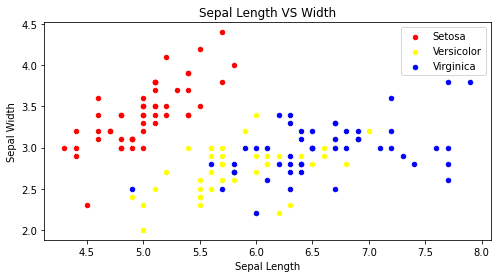

In [11]:
# Scatter plot to visualize the relationship between Sepal Length and Sepal Width
fig_sepal = data[data.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red', label='Setosa')
data[data.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='yellow', label='Versicolor',ax=fig_sepal)
data[data.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='Virginica', ax=fig_sepal)
fig_sepal.set_xlabel("Sepal Length")
fig_sepal.set_ylabel("Sepal Width")
fig_sepal.set_title("Sepal Length VS Width")
fig_sepal=plt.gcf()
fig_sepal.set_size_inches(8,4)
plt.show()

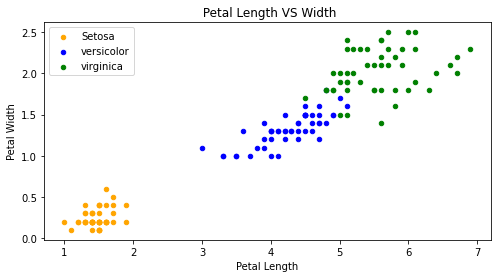

In [12]:
# Scatter plot to visualize the relationship betweenPetal Length and Petal Width
fig_petal = data[data.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
data[data.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig_petal)
data[data.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig_petal)
fig_petal.set_xlabel("Petal Length")
fig_petal.set_ylabel("Petal Width")
fig_petal.set_title(" Petal Length VS Width")
fig_petal=plt.gcf()
fig_petal.set_size_inches(8,4)
plt.show()

In [13]:
#delete column Id
del(data["Id"])
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [14]:
#convert Species into integer
target_var={"Species":{"Iris-versicolor": 0, "Iris-setosa": 1,"Iris-virginica":2}}
data.replace(target_var, inplace=True)

In [15]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

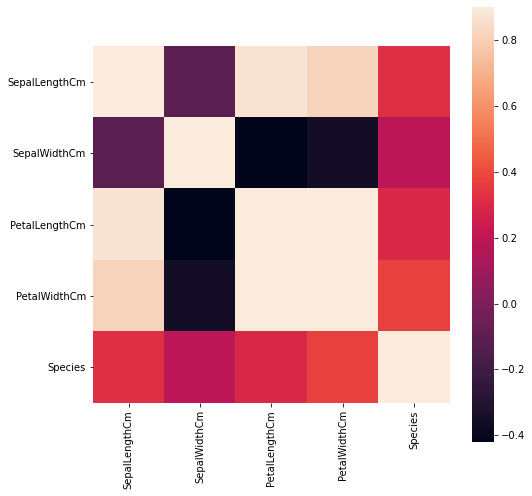

In [18]:
# correlation
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),vmax=0.9,square=True)
plt.show();

In [ ]:
#separate the features and predictor variable
data_array=data.values
X=data_array[:, 0:4]
y=data_array[:,4]
print(X)
print(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test= train_test_split(X,y,random_state=1,test_size=0.3) 

In [ ]:
#K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X,y)
y_pred_knn = knn.predict(X_test) 
print("Test set predictions ():\n {}".format(y_pred_knn))
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))



In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X,y)
y_pred_lr = lr.predict(X_test)
print("Test set predictions:\n {}".format(y_pred_lr))
print("Accuracy on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test, y_test)))



In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dc_tree=DecisionTreeClassifier(max_depth= 3, random_state=0)
dc_tree.fit(X,y)
y_pred_dc = dc_tree.predict(X_test)
print("Test set predictions:\n {}".format(y_pred_dc))
print("Accuracy on training set: {:.3f}".format(dc_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dc_tree.score(X_test, y_test)))


We will check out the species of the flower with features
SepalLengthCm:5
SepalWidthCm:2.9
PetalLengthCm:1
PetalWidthCm:0.2

In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]]) 
prediction = dc_tree.predict(X_new) 
print("Prediction: {}".format(prediction)) 


Predicted value is 1 which corresponds to Setosa Species
Therefore the given features of flower is predicted as Setosa Iris Flower

Three algorithms of Machine Learning K Nearest Neighbor, Logistic Regression and Decision Tree were used to predict the species of the iris flower.
The accuracy of all the three alogithms turned out better.

